In [1]:
import tensorflow as tf

/home/kpmadan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.images.shape

(55000, 784)

In [9]:
mnist.train.images[2].shape

(784,)

In [11]:
sample = mnist.train.images[2].reshape(28,28)

In [12]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

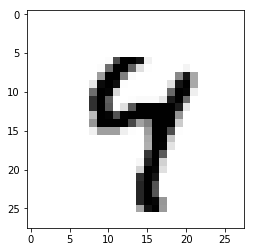

In [15]:
plt.imshow(sample, cmap= 'Greys')

In [19]:
sample1 = mnist.train.images[2034].reshape(28,28)


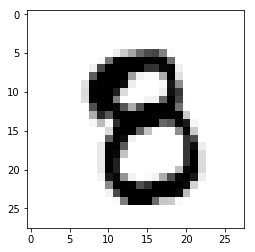

In [20]:
plt.imshow(sample1, cmap= 'Greys')

In [21]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [22]:
n_classes = 10
n_samples= mnist.train.num_examples

In [23]:
n_samples

55000

In [25]:
n_input = 784


In [30]:
n_hidden_1 = 256
n_hidden_2 = 256


In [37]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: placeholder for data input
    weight: Dict of weight
    biases: Dict of of bias value
    '''
    
    #First Hidden Layer with RELU Activation
    #X*W+B
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    #Func(x*W+B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    
    layer_2 = tf.nn.relu(layer_2)
    
    #last output layer
    
    out_layer = tf.matmul(layer_2, weights['out'])+ biases['out']
    
    return out_layer
    
    

In [32]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [33]:
weights


{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [34]:
biases ={
    'b1': tf.Variable(tf.random_normal([ n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([ n_hidden_2])),
    'out': tf.Variable(tf.random_normal([ n_classes]))
}

In [35]:
x = tf.placeholder('float', [None, n_input])

In [36]:
y = tf.placeholder('float', [None, n_classes])

In [38]:
pred = multilayer_perceptron(x, weights, biases)

In [44]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Training the Neural Net  Model

In [46]:
t = mnist.train.next_batch(10)

In [47]:
len(t)

2

In [49]:
len(t[1])

10

In [50]:
t = mnist.train.next_batch(1)

In [52]:
Xsamp, Ysamp = t

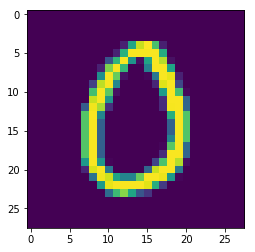

In [55]:
plt.imshow(Xsamp.reshape(28,28))

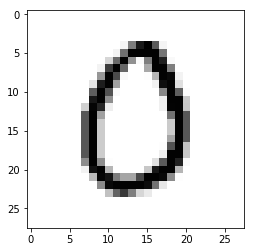

In [56]:
plt.imshow(Xsamp.reshape(28,28), cmap= 'Greys')

In [58]:
Ysamp

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
#Run the Session

In [60]:
sess = tf.InteractiveSession()

In [61]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [62]:
sess.run(init)

In [67]:
for epoch in range(training_epochs):
    
    #cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer, cost], feed_dict={x:batch_x, y: batch_y})
        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1, avg_cost))
print("Model has completed {} Epochs of training".format(training_epochs))
 

Epoch: 1 cost0.3123
Epoch: 2 cost0.2593
Epoch: 3 cost0.2107
Epoch: 4 cost0.2876
Epoch: 5 cost0.2384
Epoch: 6 cost0.1938
Epoch: 7 cost0.1588
Epoch: 8 cost0.1749
Epoch: 9 cost0.2918
Epoch: 10 cost0.1754
Epoch: 11 cost0.1484
Epoch: 12 cost0.2203
Epoch: 13 cost0.2488
Epoch: 14 cost0.1715
Epoch: 15 cost0.2273
Model has completed 15 Epochs of training


Model Evaluation

In [73]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [74]:
print(correct_predications[0])

Tensor("strided_slice_1:0", shape=(), dtype=bool)


In [75]:
correct_predications = tf.cast(correct_predictions, 'float')

In [76]:
print(correct_predications[0])

Tensor("strided_slice_2:0", shape=(), dtype=float32)


In [78]:
accuracy = tf.reduce_mean(correct_predications)

In [79]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [80]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [82]:
#mnist.test.images[0]

In [83]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9559